In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer
from scipy.integrate import quad

# Problem 1

### Question A)

### Question B)

### Question C)

In [2]:
def target_prob(x, y, mu_x1=0.0, mu_x2=3.0, mu_y1=0.0, mu_y2=3.0):
    return 1/(4*np.pi) * np.exp(-0.5*((x-mu_x1)**2 + (y-mu_y1)**2)) + 1/(4*np.pi) * np.exp(-0.5*((x-mu_x2)**2 + (y-mu_y2)**2))

In [3]:
def marginal_x(pdf, x):
    integrand = lambda y: pdf(x, y)
    return quad(integrand, -np.inf, np.inf)[0]


def marginal_y(pdf, y):
    integrand = lambda x: pdf(x, y)
    return quad(integrand, -np.inf, np.inf)[0]

In [4]:
x = np.linspace(-2, 5, 1001)
y = np.linspace(-2, 5, 1001)
xv, yv = np.meshgrid(x, y)

In [5]:
test = target_prob( xv , yv )

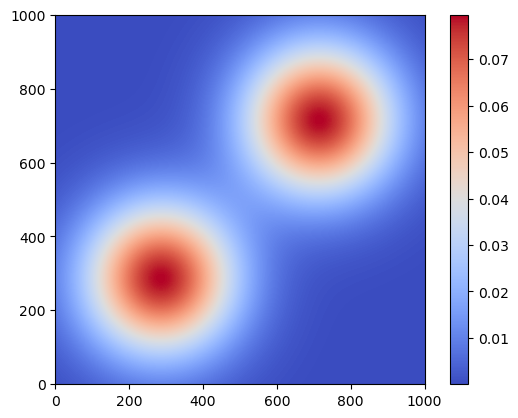

In [6]:
plt.imshow(test, origin='lower', cmap="coolwarm")
plt.colorbar()

In [7]:
def MH_MCMC(target_prob, n_steps, initial_state):
    current_state = initial_state
    samples = []
    for i in range(n_steps):
        # np.random.seed(i)
        samples.append(current_state.copy())
        x_new, y_new = np.random.multivariate_normal(current_state, cov=np.array([[0.09, 0.], [0., 0.09]]))
        accept_prob = np.min([1, target_prob(x_new, y_new) / target_prob(current_state[0], current_state[1])])
        # np.random.seed(2*i)
        mu = np.random.uniform(0, 1)
        if mu < accept_prob:
            current_state = [x_new, y_new]
        # samples.append([x_new, y_new])
        
    return np.array(samples)



In [8]:
n_steps = 10000
burnin = 5000
samples = MH_MCMC(target_prob, n_steps, np.random.uniform(-3., 6., size=2))
print(samples.shape)

(10000, 2)


Text(0.5, 0, '$y$')

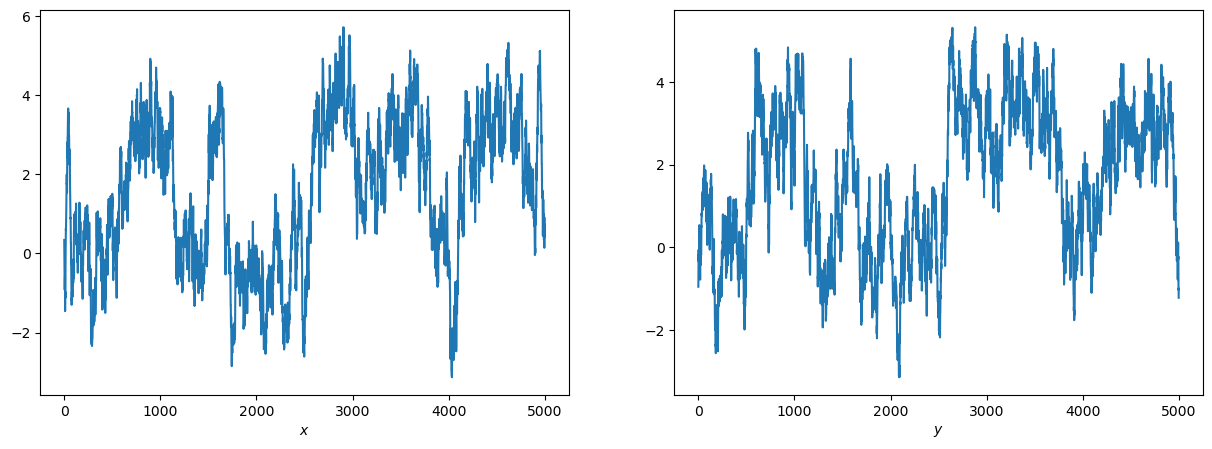

In [9]:


fig, ax = plt.subplots(1, 2, figsize = (15,5))


ax[0].plot(samples[burnin:, 0])
ax[0].set_xlabel("$x$")

ax[1].plot(samples[burnin:, 1])
ax[1].set_xlabel("$y$")

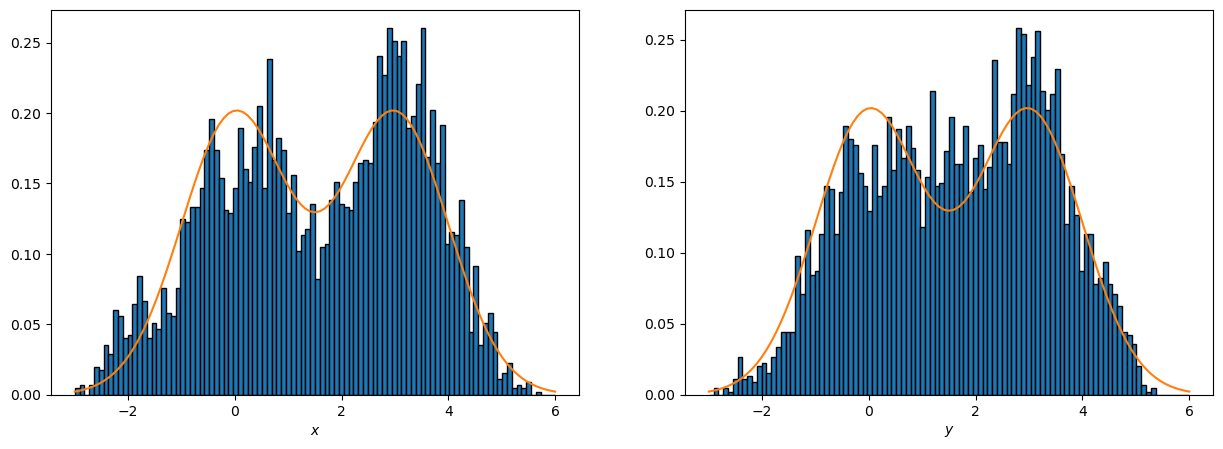

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

x = np.linspace(-3, 6, 101)
y = np.linspace(-3, 6, 101)

ax[0].hist(samples[burnin:, 0], edgecolor="black", bins=np.linspace(-3, 6, 101), density=True)
ax[0].set_xlabel("$x$")
ax[0].plot(x, [marginal_x(target_prob, xi) for xi in x])

ax[1].hist(samples[burnin:, 1], edgecolor="black", bins=np.linspace(-3, 6, 101), density=True)
ax[1].set_xlabel("$y$")
ax[1].plot(y, [marginal_y(target_prob, yi) for yi in y])

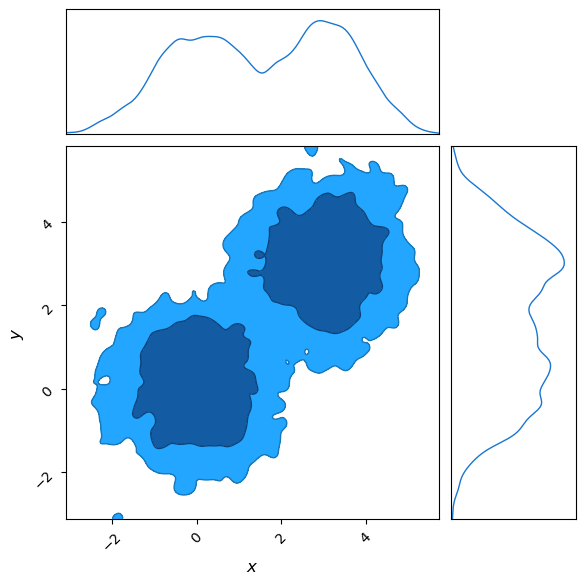

In [11]:
# If you pass in parameter labels and only one chain, you can also get parameter bounds
fig = ChainConsumer().add_chain(samples[:], parameters=["$x$", "$y$"]).plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [12]:
def MCMC_nwalkers(target_prob, n_steps, initial_state): 
    
    nwalkers = initial_state.shape[0]
    n_dim = initial_state.shape[-1]

    current_state = initial_state.copy()
    samples = []
    for i in range(n_steps):
        samples.append(current_state.copy())
        prop_state = np.random.multivariate_normal(mean=[0, 0], cov=np.array([[0.09, 0], [0., 0.09]]), size=nwalkers) + current_state
        accept_prob = np.minimum(1, target_prob(prop_state[:, 0], prop_state[:, 1]) / target_prob(current_state[:, 0], current_state[:, 1]))

        mu = np.random.uniform(0, 1, size=nwalkers)

        indices = accept_prob > mu

        current_state[indices] = prop_state[indices]

    samples = np.array(samples)
    samples = samples.reshape(-1, n_dim)
    return samples

In [ ]:
nwalkers = 1000

initial_state = np.random.uniform(-10, 10, size=(nwalkers, 2))
samples_nwalkers = MCMC_nwalkers(target_prob, 10000, initial_state)
# plt.plot(np.arange(5000), np.array(samples)[-5000:, 0]);
# plt.hist(samples_nwalkers[-5000:, 0], density=True, bins=np.linspace(-2, 6, 101), edgecolor="black");

In [14]:
print(samples_nwalkers.shape)

(10000000, 2)


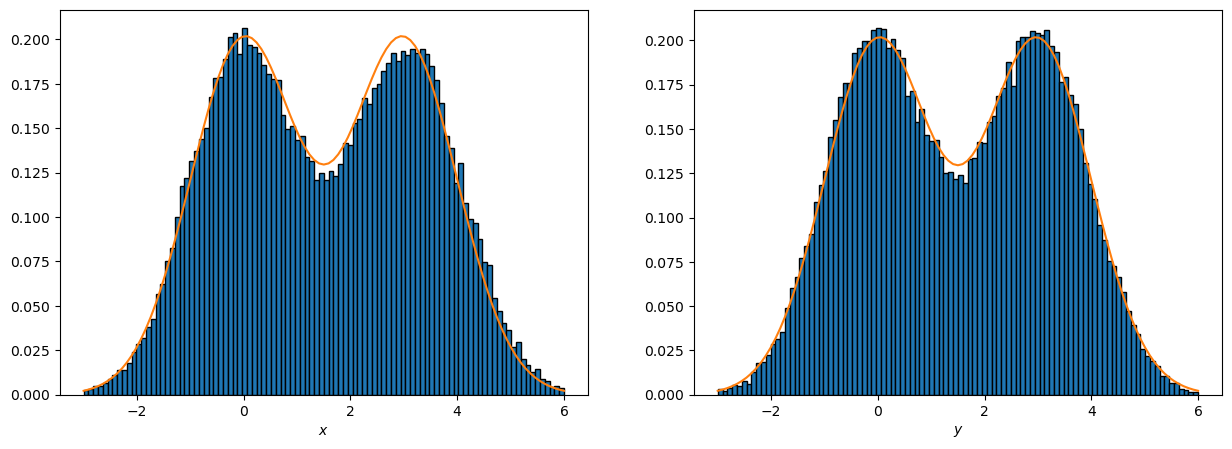

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
burnin = -100000

x = np.linspace(-3, 6, 101)
y = np.linspace(-3, 6, 101)

ax[0].hist(samples_nwalkers[burnin:, 0], edgecolor="black", bins=np.linspace(-3, 6, 101), density = True)
ax[0].set_xlabel("$x$")
ax[0].plot(x, [marginal_x(target_prob, xi) for xi in x])

ax[1].hist(samples_nwalkers[burnin:, 1], edgecolor="black", bins=np.linspace(-3, 6, 101), density = True)
ax[1].set_xlabel("$y$")
ax[1].plot(y, [marginal_y(target_prob, yi) for yi in y])



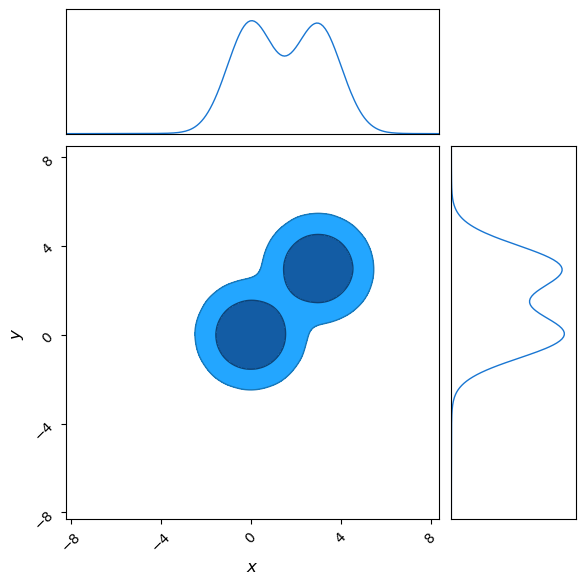

In [16]:
fig = ChainConsumer().add_chain(samples_nwalkers, parameters=["$x$", "$y$"]).plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

### Some Trials



$$
p\left( x,y \right) =\exp \left( -\frac{x^2+y^2}{0.2} \right) +\exp \left( -\frac{\left( x-10 \right) ^2+\left( y-10 \right) ^2}{0.2} \right) 
$$

In [17]:
def trial_prob(x, y):
    return np.exp(-(x**2 + y**2)/(2*0.1)) + np.exp(-((x-10)**2 + (y-10)**2)/(2*0.1))


In [18]:
trial_marg_x = np.array([marginal_x(trial_prob, xi) for xi in np.linspace(-2,12,1001)])

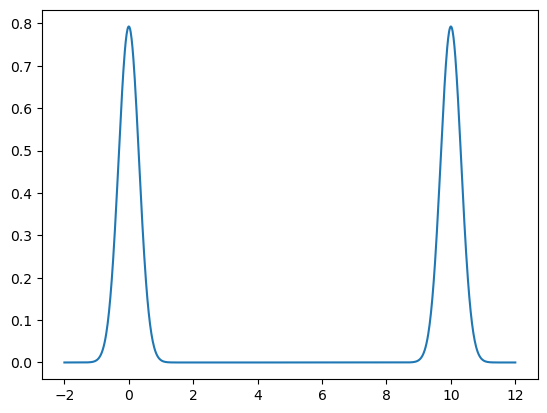

In [19]:
plt.plot(np.linspace(-2,12,1001), trial_marg_x)

In [20]:
one_chain_samples = MH_MCMC(trial_prob, 10000, np.random.uniform(-5, 15, 2))
print(one_chain_samples.shape)


(10000, 2)


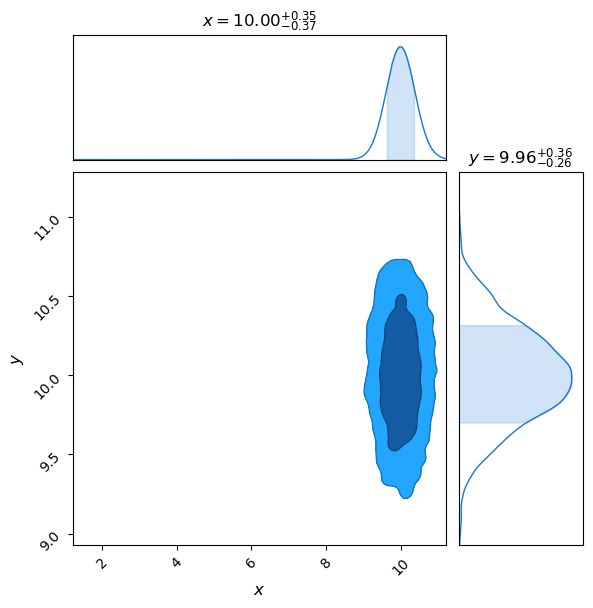

In [21]:
fig = ChainConsumer().add_chain(one_chain_samples, parameters=["$x$", "$y$"]).plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [22]:
nwalkers = 1000

initial_state = np.random.uniform(-5, 15, size=(nwalkers, 2))

multi_chain_samples = MCMC_nwalkers(trial_prob, 10000, initial_state)
print(samples.shape)

/scratch-local/slurm-job-tmp-70459/ipykernel_11566/2412606100.py:11: RuntimeWarning: divide by zero encountered in divide
  accept_prob = np.minimum(1, target_prob(prop_state[:, 0], prop_state[:, 1]) / target_prob(current_state[:, 0], current_state[:, 1]))
/scratch-local/slurm-job-tmp-70459/ipykernel_11566/2412606100.py:11: RuntimeWarning: invalid value encountered in divide
  accept_prob = np.minimum(1, target_prob(prop_state[:, 0], prop_state[:, 1]) / target_prob(current_state[:, 0], current_state[:, 1]))


(10000, 2)


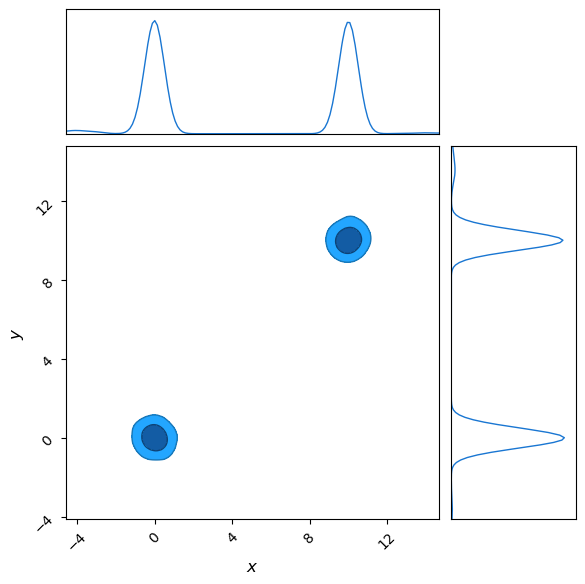

In [23]:
fig = ChainConsumer().add_chain(multi_chain_samples[-1000:], parameters=["$x$", "$y$"]).plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

# Problem 2 

In [24]:
data = np.loadtxt('/home/s/Sijin.Chen/course/from_data_to_insights/tutorial06/kde_N100.dat')[:]
N = len(data)
print(data.shape)
print(data)

(100,)
[ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996 -1.19276461 -0.20487651
 -0.35882895  0.6034716  -1.66478853 -0.70017904  1.15139101  1.85733101
 -1.51117956  0.64484751 -0.98060789 -0.85685315 -0.87187918 -0.42250793
  0.99643983  0.71242127  0.05914424 -0.36331088  0.00328884 -0.10593044
  0.79305332 -0.63157163 -0.00619491 -0.10106761 -0.05230815  0.24921766
  0.19766009  1.33484857 -0.08687561  1.56153229 -0.30585302 -0.47773142
  0.10073819  0.35543847  0.26961241  1.29196338  1.13934298  0.4944404
 -0.33633626 -0.10061435  1.41339802  0.22125412 -1.31077313 -0.68956523
 -0.57751323  1.15220477 -0.10716398  2.26010677  0.65661947  0.12480683
 -0.43570392  0.97217931 -0.24071114 -0.82412345  0.56813272  0.01275832
  1.18906073 -0.07359332 -2.85968797  0.7893664  -1.87774088  1.53875615
  1.82136474 -0.42703139 -1.16470191 -1.39707402  0.87265462 -0.20211818
 -0.59835993 -0.2434197   2.08851469  0.34691

In [25]:
bandwidth = np.std(data) * (4/3/N)**0.2
p = 0
x = np.linspace(-5, 5, 1001)
for i in range(N):
    diff = x - data[i]
    p = p + np.exp(-0.5*(diff/bandwidth)**2)



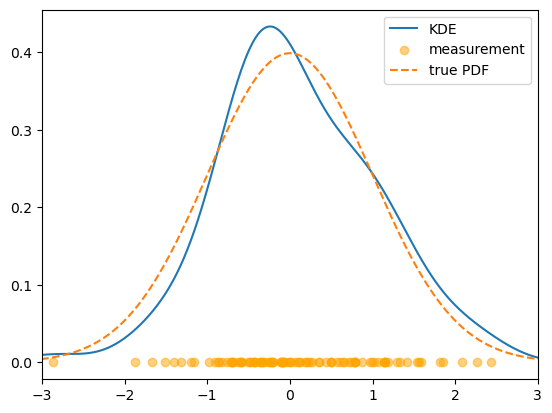

In [32]:
# for i in range(N):
#     diff = x - data[i]
#     k = np.exp(-0.5*(diff/bandwidth)**2)
#     plt.plot(x, k/np.trapz(k, x), linestyle = "dotted", color="grey", linewidth=1)

plt.plot(x, p/np.trapz(p, x), label="KDE")
plt.scatter(data, np.zeros(len(data)), color="orange", alpha=0.5, label="measurement")
plt.plot(x, 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x)**2), label = "true PDF", linestyle="--")


plt.xlim(-3.0, 3.0)
plt.legend()